## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 4

# Question 3

## N-Queens Problem Using Local Search Methods

The N-Queens Problem is a classical constraint satisfaction problem where the goal is to place N queens on an N×N chessboard such that no two queens attack each other. This means:

    • No two queens can be in the same row. 
    • No two queens can be in the same column. 
    • No two queens can be on the same diagonal.
    
In this exercise, we will solve the N-Queens Problem using three Hill Climbing variants:

    1. Simple Hill Climbing – Moves to a better neighboring state if one exists, stopping at local optima. 
    2. Stochastic Hill Climbing – Chooses a random better move instead of always picking the best one. 
    3. Steepest Ascent Hill Climbing – Evaluates all possible moves and chooses the best improvement.

## Tasks to Perform 
### For N = 4, 8, 16, 32, 64, perform the following:

### 1. Generate an Initial Board:
### Start with a random configuration where some queens may be attacking each other. 

In [7]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def generate_initial_board(N):
    return random.sample(range(N), N)

In [9]:
N = 8

initial_board = generate_initial_board(N)
print("Initial Board for N:", initial_board)

Initial Board for N: [2, 5, 3, 1, 6, 7, 4, 0]


### 2. Apply Each Hill Climbing Algorithm: 
    o Implement Simple Hill Climbing, Stochastic Hill Climbing, and Steepest Ascent Hill Climbing. 
    o Track the number of iterations taken to find a valid solution (or detect failure due to local optima). 
    o Compare performance across different values of N. 
    o Add, additional performance metrics such as the number of iterations. 

In [10]:
def calculate_conflicts(board):
    conflicts = 0
    N = len(board)
    for i in range(N):
        for j in range(i + 1, N):
            if abs(board[i] - board[j]) == abs(i - j):  
                conflicts += 1
    return conflicts

In [11]:
calculate_conflicts(np.array([0,1,9,12]))

1

In [5]:
def simple_hill_climbing(N, max_iterations=1000):
    board = generate_initial_board(N)
    iterations = 0
    while calculate_conflicts(board) > 0 and iterations < max_iterations:
        iterations += 1
        neighbors = []
        for col in range(N):
            for row in range(N):
                if row != board[col]:
                    neighbor = board[:]
                    neighbor[col] = row
                    neighbors.append(neighbor)
        best_neighbor = min(neighbors, key=calculate_conflicts)
        
        if calculate_conflicts(best_neighbor) >= calculate_conflicts(board):
            print(f"Stuck at local optima after {iterations} iterations")
            return board, iterations, True  
        
        board = best_neighbor

    return board, iterations, False  

In [6]:
def stochastic_hill_climbing(N, max_iterations=1000):
    board = generate_initial_board(N)
    iterations = 0
    while calculate_conflicts(board) > 0 and iterations < max_iterations:
        iterations += 1
        neighbors = []
        for col in range(N):
            for row in range(N):
                if row != board[col]:
                    neighbor = board[:]
                    neighbor[col] = row
                    neighbors.append(neighbor)
        
        improving_neighbors = [neighbor for neighbor in neighbors if calculate_conflicts(neighbor) < calculate_conflicts(board)]
        
        if not improving_neighbors:
            print(f"Stuck at local optima after {iterations} iterations")
            return board, iterations, True 
        
        board = random.choice(improving_neighbors)

    return board, iterations, False  

In [7]:
def steepest_ascent_hill_climbing(N, max_iterations=1000):
    board = generate_initial_board(N)
    iterations = 0
    while calculate_conflicts(board) > 0 and iterations < max_iterations:
        iterations += 1
        neighbors = []
        for col in range(N):
            for row in range(N):
                if row != board[col]:
                    neighbor = board[:]
                    neighbor[col] = row
                    neighbors.append(neighbor)
        
        best_neighbor = min(neighbors, key=calculate_conflicts)
        
        if calculate_conflicts(best_neighbor) >= calculate_conflicts(board):
            print(f"Stuck at local optima after {iterations} iterations")
            return board, iterations, True  
        
        board = best_neighbor

    return board, iterations, False 

In [8]:
solution_simple, iterations_simple, failed_simple = simple_hill_climbing(N)

print(f"Simple Hill Climbing Solution for N={N}: {solution_simple}, Iterations: {iterations_simple}")
if failed_simple:
    print("Failed due to local optima.")

Simple Hill Climbing Solution for N=8: [1, 3, 1, 6, 1, 5, 0, 5], Iterations: 3


In [9]:
solution_stochastic, iterations_stochastic, failed_stochastic = stochastic_hill_climbing(N)

print(f"Stochastic Hill Climbing Solution for N={N}: {solution_stochastic}, Iterations: {iterations_stochastic}")
if failed_stochastic:
    print("Failed due to local optima.")

Stochastic Hill Climbing Solution for N=8: [7, 4, 6, 3, 0, 6, 3, 5], Iterations: 6


In [10]:
solution_steepest, iterations_steepest, failed_steepest = steepest_ascent_hill_climbing(N)

print(f"Steepest Ascent Hill Climbing Solution for N={N}: {solution_steepest}, Iterations: {iterations_steepest}")
if failed_steepest:
    print("Failed due to local optima.")

Steepest Ascent Hill Climbing Solution for N=8: [4, 1, 7, 0, 3, 6, 0, 5], Iterations: 2


In [11]:
def run_experiment(N):
    start_time = time.time()
    solution_simple, iterations_simple, failed_simple = simple_hill_climbing(N)
    time_simple = time.time() - start_time

    start_time = time.time()
    solution_stochastic, iterations_stochastic, failed_stochastic = stochastic_hill_climbing(N)
    time_stochastic = time.time() - start_time

    start_time = time.time()
    solution_steepest, iterations_steepest, failed_steepest = steepest_ascent_hill_climbing(N)
    time_steepest = time.time() - start_time

    return {
        'N': N,
        'Simple Iterations': iterations_simple,
        'Stochastic Iterations': iterations_stochastic,
        'Steepest Iterations': iterations_steepest,
        'Simple Time': time_simple,
        'Stochastic Time': time_stochastic,
        'Steepest Time': time_steepest,
        'Simple Failed': failed_simple,
        'Stochastic Failed': failed_stochastic,
        'Steepest Failed': failed_steepest,
    }

In [14]:
results = []
for N in [4, 8, 16, 32, 64]:
    results.append(run_experiment(N))

df = pd.DataFrame(results)

In [15]:
df

,N,Simple Iterations,Stochastic Iterations,Steepest Iterations,Simple Time,Stochastic Time,Steepest Time,Simple Failed,Stochastic Failed,Steepest Failed
0,4,1,1,1,0.000000,0.000000,0.000000,False,False,False
1,8,2,4,3,0.001182,0.001288,0.000000,False,False,False
2,16,9,7,6,0.033982,0.032406,0.015682,False,False,False
3,32,13,19,13,0.515961,1.547228,0.538912,False,False,False
4,64,21,41,24,13.254012,50.342453,15.045349,False,False,False


### 4. Analyze and Compare: 
    o Measure the number of restarts needed if a local optima is reached. 
    o Compare success rates, execution times, and efficiency of each algorithm.

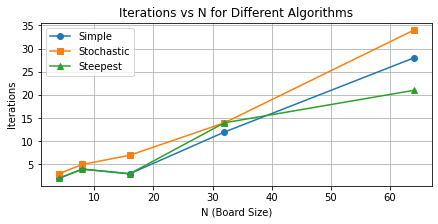

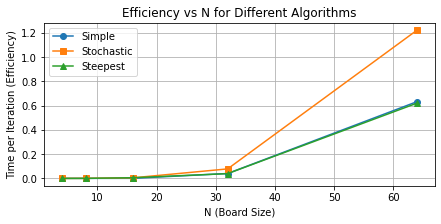

In [13]:
df['Success Rate (Simple)'] = df['Simple Failed'].apply(lambda x: 0 if x else 1)
df['Success Rate (Stochastic)'] = df['Stochastic Failed'].apply(lambda x: 0 if x else 1)
df['Success Rate (Steepest)'] = df['Steepest Failed'].apply(lambda x: 0 if x else 1)

df['Simple Efficiency'] = df['Simple Time'] / df['Simple Iterations']
df['Stochastic Efficiency'] = df['Stochastic Time'] / df['Stochastic Iterations']
df['Steepest Efficiency'] = df['Steepest Time'] / df['Steepest Iterations']

plt.figure(figsize=(7, 3))
plt.plot(df['N'], df['Simple Iterations'], label='Simple', marker='o')
plt.plot(df['N'], df['Stochastic Iterations'], label='Stochastic', marker='s')
plt.plot(df['N'], df['Steepest Iterations'], label='Steepest', marker='^')
plt.xlabel('N (Board Size)')
plt.ylabel('Iterations')
plt.title('Iterations vs N for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(df['N'], df['Simple Efficiency'], label='Simple', marker='o')
plt.plot(df['N'], df['Stochastic Efficiency'], label='Stochastic', marker='s')
plt.plot(df['N'], df['Steepest Efficiency'], label='Steepest', marker='^')
plt.xlabel('N (Board Size)')
plt.ylabel('Time per Iteration (Efficiency)')
plt.title('Efficiency vs N for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

### Remarks 

#### 1. Simple Hill Climbing:

    Performance: Works well for smaller N (e.g., N=4), solving the problem in few iterations. However, as N increases, it struggles with local optima and requires more iterations.
    Execution Time: Increases as N grows, from a few milliseconds (N=8) to over 13 seconds (N=64).
    Failures: Did not fail in this experiment, but becomes less effective with larger N due to local optima.
    

#### 2. Stochastic Hill Climbing:

    Performance: Similar to Simple Hill Climbing, but with some randomness in moves. It performed well for smaller N, but failed at N=8.
    Execution Time: Slightly higher than Simple Hill Climbing, especially for larger N.
    Failures: Failed at N=8, showing that random moves don't always avoid local optima effectively.
    
    
#### 3. Steepest Ascent Hill Climbing:

    Performance: The most reliable overall, especially for larger N. Evaluates all possible moves and avoids local optima more effectively, though it requires more iterations than the others.
    Execution Time: Takes significantly more time (up to 50 seconds for N=64) due to evaluating all potential moves.
    Failures: Did not fail at any point, performing well even for large N.